# Imports

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# keep matplotlib interactive
%matplotlib notebook
# use ggplot style
plt.style.use('ggplot')

# Churn Prediction

Any subscription-based business is committed to keep their customer happy in exchange for their loyalty. Despite their efforts, some customers will eventually not renew their subscription. In this latter case, if a customer has not renewed within a time window after its subscription expiration date, this customer is said to have churned. Although each service provider offers several subscription options (monthly, yearly, basic, premium,...), the time window to consider a customer has churned varies quite a lot. It seems that each company sets their own.

This project is based on a [Kaggle competition](https://www.kaggle.com/c/kkbox-churn-prediction-challenge) where KKBOX, an Asian leading __music streaming service__, is interested in learning from their customer behavior to prevent them from churning.

The __grace period is 30 days__ in order to consider a customer has churned after its current membership ends. The goal is to determine churn from one month to the next.

In [15]:
# train.csv only contains 
train_dir = os.path.join(os.pardir, 'data', 'raw', 'train.csv')
df_train = pd.read_csv(train_dir, index_col = 'msno')

In [3]:
df_train.head()

,is_churn
msno,
waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [17]:
# df_train.iloc[:int(10)].count()
df_train.info()
# df_train.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 992931 entries, waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y= to ZoVEIVMCpKT9/MJgqO+fh9xYrNM2vNisLhJ4xY/CVyk=
Data columns (total 1 columns):
is_churn    992931 non-null int64
dtypes: int64(1)
memory usage: 15.2+ MB


<IPython.core.display.Javascript object>


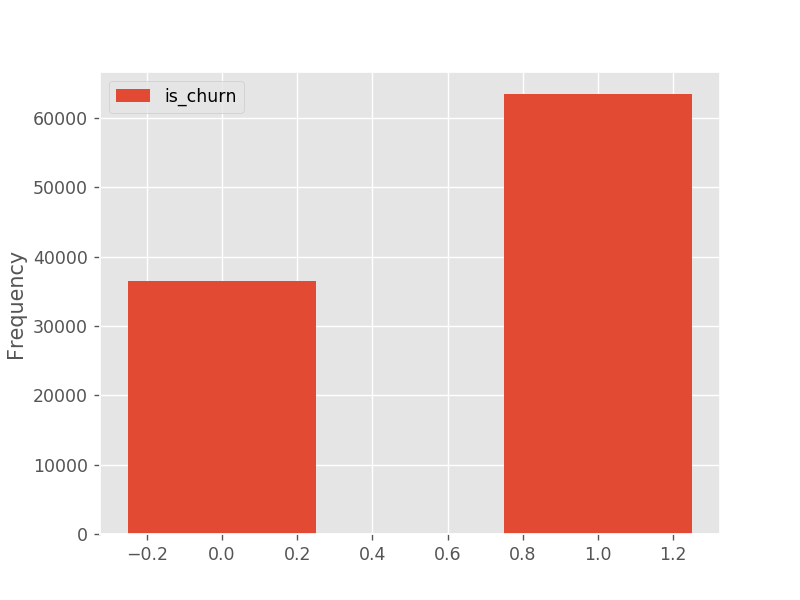

In [34]:
df_train.iloc[:int(1e5)].plot(kind='hist', bins=[0, 1, 2], rwidth=0.5, align = 'left')

# Data Description
There 3 data files that can tell us about customer behavior.

                                                

|                                       transactions.csv                                        |
|-----------------------------------------------------------------------------------------------|
| msno                   | user id  (letters and digits)                                        |
| payment_method_id      | payment method   (masked)                                            |
| payment_plan_days      | length of membership plan in days                                    |
| plan_list_price        | in New Taiwan Dollar (NTD)                                           |
| actual_amount_paid     | in New Taiwan Dollar (NTD)                                           |
| is_auto_renew          | true when customer opted in renewing its subscription automatically  |
| transaction_date       | format %Y%m%d                                                        |
| membership_expire_date | format %Y%m%d                                                        |
| is_cancel              | whether or not the user canceled the membership in this transaction. |



|              user_logs.csv                                              |
|-------------------------------------------------------------------------|
| msno       | user id  (letters and digits)                              |
| date       | format %Y%m%d                                              |
| num_25     | # of songs played less than 25% of the song length         |
| num_50     | # of songs played between 25% to 50% of the song length    |
| num_75     | # of songs played between 50% to 75% of of the song length |
| num_985    | # of songs played between 75% to 98.5% of the song length  |
| num_100    | # of songs played over 98.5% of the song length            |
| num_unq    | # of unique songs played                                   |
| total_secs | total seconds played                                       |

|                                    members.csv                  |
|---------------------------------|-------------------------------|
| msno                            |user id  (letters and digits)  |
| city                            |          name of city         |
| bd                              | age$^i$                       |
| gender                          |            gender             |
| registered_via                  |     registration method       |
| registration_init_time          |          format %Y%m%d        |
| expiration_date                 | format %Y%m%d $^{ii}$         |

$^i$Note: this column has outlier values ranging from -7000 to 2015 please use your judgement.

$^{ii}$Note: taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.

### Transactions

In [ ]:
transaction_dir = os.path.join(os.pardir, 'data', 'raw', 'transactions.csv')
df_tr = pd.read_csv(transaction_dir, index_col = 'msno', parse_dates=['transaction_date', 'membership_expire_date'])

In [ ]:
df_tr.info()